# PHYS3009 Project: Modelling the Emission

Name:

Student No.:

total marks: 36

## Purpose of this Project

In this project you will learn how the energy spectrum from an observation can be used to study the astrophysical mechanisms at work in the source. This project will make use of the non-thermal radiation mechanisms learned in PHYS3008 and the data sets created in PHYS3009.

You will need the data files you have created in the TeV Astronomy project, ```PKS2155.fits```, and in the Fermi/LAT project, ```4fgl_j2158.8-3013_sed.ecsv```. Place these files in the working directory of this notebook. If you are working on mybinder you will need to upload your own data file: Go to the jupyter home page (not this notebook, it is in a different tab or window of your browser) and click on Upload in the top-right corner.

## Load and test the modules

As usual we will start with importing the necessary modules and we check the versions of ```naima``` and ```gammapy```.

In [ ]:
import naima

naima.__version__

In [ ]:
import gammapy

gammapy.__version__

In [ ]:
import numpy as np

np.__version__

In [ ]:
from astropy.table import Table

from astropy import units as u

from astropy import constants as c

import matplotlib.pyplot as plt

In [ ]:
from gammapy.estimators import FluxPoints

from gammapy.datasets import Datasets, FluxPointsDataset

from gammapy.modeling.models import (
    PowerLawSpectralModel,
    ExpCutoffPowerLawSpectralModel,
    LogParabolaSpectralModel,
    SkyModel,
    NaimaSpectralModel,
    CompoundSpectralModel
)
import naima

import operator

from gammapy.modeling import Fit

In [ ]:
import copy
fit = Fit()

## Additional Parameters and Settings

We have measured the gamma-ray and radio flux on Earth and now we want to model the emission in the source. We will need the distance to the source. The distance cannot be measured directly from gamma rays or radio, and sometimes the distance is not known. Good for us that the distance to PKS 2155-304 is known.

In [ ]:
distance = 1.5*u.Glyr

## Loading the Data

### Reading the H.E.S.S. points

We have produced the data points with gammapy, so it should be easy to load them again. If your file has a different name then change the filename in the next cell.

In [ ]:
hesspoints = FluxPoints.read('PKS2155.fits')

We see that everything is there what we have produced last time.

In [ ]:
hesspoints.plot()

Expected output:

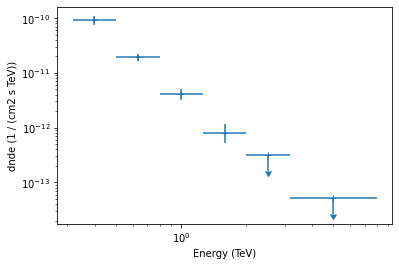

Your plot may look slightly different. 

Output produced: **[1 mark]**

Now we create a data set which combines the flux points and a model we want to fit. We should use the same model as in the project before.

In [ ]:
hesspoints_ds = FluxPointsDataset(SkyModel(spectral_model=PowerLawSpectralModel()), hesspoints, name='HESS')

Next we fit the model to the flux points.

In [ ]:
result=fit.run(hesspoints_ds)
print(result)

Make sure that the optimization terminated successfully. These numbers are a bit different then what we have found in the direct fit to the data. This is due to the extra step of generating flux points and refitting these points. But within errors this agrees very well.

In [ ]:
hesspoints_ds.plot_fit()

Expected output:

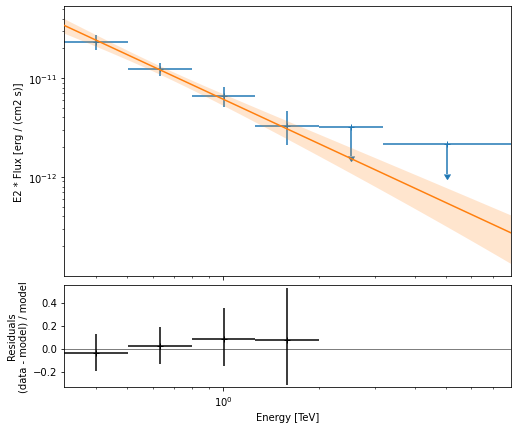

We will keep the spectral index for later:

In [ ]:
SpecIndex_HESS = result.parameters['index'].value
SpecIndex_HESS_error = result.parameters['index'].error

### Reading the Fermi/LAT Data Points

**Exercise:**

Let's do the same with the Fermi/LAT data points. Place your the file ```4fgl_j2158.8-3013_sed.ecsv``` in your working directory or on mybinder and load the flux points.

In [ ]:
# your code here

#fermipoints = ...


In [ ]:
fermipoints.plot()

Expected output:

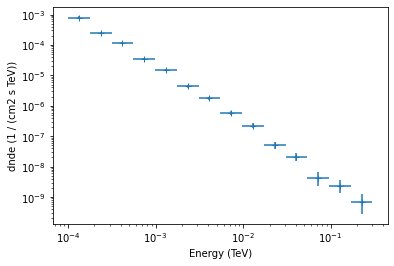

Your plot may look slightly different. 

Output produced: **[1 mark]**

**Exercise:**

Create a data set for these points and add a Power Law with a reference energy of 100 GeV as spectral model. 

In [ ]:
# your code here
#fermipoints_ds = 


In [ ]:
print(fermipoints_ds)

Expected output:

```
FluxPointsDataset
-----------------

  Name                            : Fermi/LAT 

  Number of total flux points     : 14 
  Number of fit bins              : 14 

  Fit statistic type              : chi2
  Fit statistic value (-2 log(L)) : 1126.92

  Number of models                : 1 
  Number of parameters            : 3
  Number of free parameters       : 2

  Component 0: SkyModel
  
    Name                      : 3vqW25ak
    Datasets names            : None
    Spectral model type       : PowerLawSpectralModel
    Spatial  model type       : 
    Temporal model type    
      index                         :      2.000   +/-    0.00             
      amplitude                     :   1.00e-12   +/- 0
      reference             (frozen):    100.000       GeV

0   +/-    0.00       
```

Some numbers might be different.

**[3 marks]**

**Exercise:**

Now fit the data set, saving the results in a variable named ```results```. Make sure that the fit converges and print the best-fit parameter table.

**[3 marks]**

In [ ]:
# your code here
# ~ 4 lines of code


Let's keep the spectral index for later:

In [ ]:
SpecIndex_Fermi = results.parameters['index'].value
SpecIndex_Fermi_error = results.parameters['index'].error

You can also try to fit a log-parabola as was done in the Fermi/LAT project.

### Combine the Gamma-Ray Flux Points

The MeV to GeV and TeV flux points where obtained with different instruments and different techniques but usually the emission comes from the same processes. So we can combine these points and analyse together.

We have individually fitted the H.E.S.S. and Fermi/LAT data points. Both data sets can be well described by a pure power law. But the spectral indices are different:

In [ ]:
print('H.E.S.S.: {:3.2f} +/- {:3.2f} vs. Fermi: {:3.2f} +/- {:3.2f}'.format(SpecIndex_HESS, 
                                                                            SpecIndex_HESS_error, 
                                                                            SpecIndex_Fermi, 
                                                                            SpecIndex_Fermi_error))

This means that we cannot fit all the points with one single power law. Different models can be tried. For this project we will use a power law with an exponential cut-off.

Let's create a Datasets object called ```gamma_ds``` by comining the ```fermipoints_ds``` and ```gammapoints_ds``` datasets. We then add a power law with exponential cut-off as spectral model. Finally, we fit the model, make sure that the fit converges and printing the table of best-fit parameters. The fit may produce some RunTimeWarnings which you can ignore.



In [ ]:
gamma_ds = Datasets([fermipoints_ds, hesspoints_ds])
ecpl = ExpCutoffPowerLawSpectralModel()
gamma_ds.models = SkyModel(spectral_model=ecpl)
print(gamma_ds)
fit = Fit()

gamma_result = fit.run(datasets=gamma_ds)
print(gamma_result)
print(gamma_result.parameters.to_table())

Let's make a plot of the data set with the fit result and the residuals.

In [ ]:
ax = plt.subplot()
ax.yaxis.set_units(u.Unit("TeV cm-2 s-1"))
ax.xaxis.set_units(u.Unit("TeV"))
kwargs = {"ax": ax, "sed_type": "e2dnde"}

for d in gamma_ds:
    d.data.plot(label=d.name, **kwargs)

energy_bounds = [1e-4, 1e1] * u.TeV
ecpl.plot(energy_bounds=energy_bounds, color="k", **kwargs)
ecpl.plot_error(energy_bounds=energy_bounds, **kwargs)
ax.set_ylim(1e-20, 1e-9)
ax.set_xlim(energy_bounds)
ax.legend()
plt.show()


Expected output:

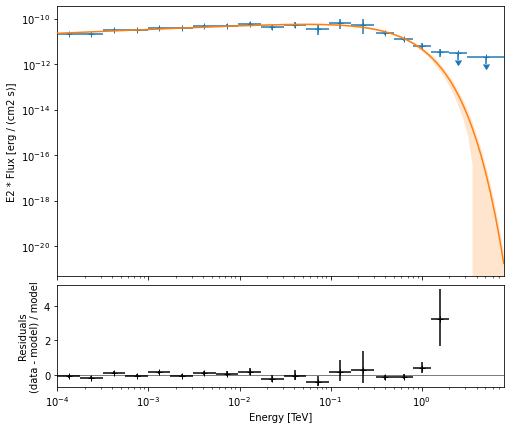



You see that the fit of the spectral index is dominated by Fermi/LAT energy range. The steeper H.E.S.S. data points lead to a turn-over of the spectrum. The energy cut-off of the spectrum is

In [ ]:
print('exponential cut-off: {:3.2f} +- {:3.2f} TeV'.format(1/gamma_result.parameters['lambda_'].value,
                                                       gamma_result.parameters['lambda_'].error/
                                                       (gamma_result.parameters['lambda_'].value)**2)
     )

### Radio Data
We will use the data points from the paper E. Liuzzo et al 2013 AJ 145 73 (http://dx.doi.org/10.1088/0004-6256/145/3/73). You can find the values in Table 3, let's put the values for the frequency and F_tot in numpy arrays. We skip the last line of the table.

In [ ]:
frequency = u.Quantity(np.array([1.4, 4.8, 8.4, 15, 22.5])*u.GHz)
Ftot = u.Quantity(np.array([0.41, 0.44, 0.44, 0.45, 0.40])*u.Jy)

We have the photon frequencies, but we want the energy.

In [ ]:
Ephoton_radio = (frequency*c.h).to(u.TeV)

The unit Jansky is flux per frequency. We need the flux per photon energy, so we divide by Planck's constant. We have the energy flux, but we want the photon flux, so we divide by the photon energy.

In [ ]:
Ftot = Ftot/c.h/Ephoton_radio

In [ ]:
Ftot

In [ ]:
Ftot = Ftot.to(1/u.cm**2/u.s/u.TeV)

We want to do a fit of the data points, so we need to set an error on the flux. The flux values have two significant figures, let's assume that the error is 10%.

In [ ]:
Ftot_error = Ftot*0.1

Let's make a table of the data points.

In [ ]:
radio_table = Table([Ephoton_radio.to(u.TeV), Ftot, Ftot_error], 
                    names = ['e_ref', 'dnde', 'dnde_err'])

radio_table.meta['SED_TYPE'] = 'dnde'

In [ ]:
radio_table

In [ ]:
radiopoints = FluxPoints.from_table(radio_table)

In [ ]:
radiopoints.plot(energy_power=2)

## Fitting Astrophysical Models

So far, we have fitted power laws (with and without cut-off) to our data. We just described the shape of the gamma-ray energy spectrum. Now we want to fit astrophysical models and measure astrophysical parameters.

We will take a population of protons or electrons and model the gamma-ray emission from these particles. The energy spectrum of these particles should follow a power law with exponential cut-off. Let's create spectra for electrons and protons. 

We will use the ```ExponentialCutoffPowerLaw``` functions from ```naima``` as we have done in PHYS3008. This is a power law with a super-exponential cut-off,
$$
\frac{dN}{dE} = A \times \left( \frac{E}{E_0} \right) ^{-\alpha} \times \exp \left( - \left(\frac{E}{E_\mathsf{cutoff}}\right)^\beta \right),
$$
where we will set $\beta = 1$ to obtain a normal exponential cut-off. We will set all parameters to some meaningful values.

Here is the parametrisation of the electron distribution.

In [ ]:
# electron distribution
electrons = naima.models.ExponentialCutoffPowerLaw(amplitude = 1e45 / u.eV,
                                                   e_0 = 1 * u.TeV,
                                                   alpha = SpecIndex_Fermi,
                                                   e_cutoff = 1 * u.TeV,
                                                   beta = 1)

**Exercise:**

Make a proton distribution. You can use the same parameters as above.

**[1 mark]**

In [ ]:
# your code here

# protons = ...


### Hadronic Model

In a hadronic model the protons collide with ambient material. The neutral pions produced in these collisions decay into gamma rays. The only parameter in this process is the target particle density $n$. We will set $n$ to one particle per cubic-centimetre.

In [ ]:
n = 1./ u.cm**3

Next we create a model for pion decays from ```naima```. The paramters are the proton distribution and the density.

In [ ]:
hadronic = naima.models.PionDecay(protons, n)

We set the total energy in protons to a reasonable value. If the fit later on does not converge then you may need to adjust this value here.

In [ ]:
hadronic.set_Wp(1e61*u.erg)

This is a ```naima``` model, we want to include this in ```gammapy```. There is a ```NaimaSpectralModel``` for this. We will also add the distance to the source.

In [ ]:
hadronic_model = NaimaSpectralModel(hadronic, distance=distance)

In [ ]:
hadronic_model.parameters.to_table()

All parameters are free for the fit. We cannot fit the reference energy ```e_0``` we must freeze it.

In [ ]:
hadronic_model.parameters['e_0'].frozen = True

We could fit the ```beta``` parameter as well. But then we will need to check if it is significantly different from 1. Let's keep this parameter at 1 and freeze it.

In [ ]:
hadronic_model.parameters['beta'].frozen = True

In [ ]:
hadronic_model.parameters.to_table()

Now we create a new FluxPointsDataSet with the new model.

In [ ]:
#hadronic_ds = FluxPointsDataset(SkyModel(spectral_model=hadronic_model), gammapoints)
hadronic_ds = Datasets([fermipoints_ds, hesspoints_ds])
hadronic_ds.models = SkyModel(spectral_model=hadronic_model)
print(hadronic_ds)



**Exercise:**

Fit the data set. Make sure that the fit converges. You may need to run the fit several times as our starting parameters are far off the best-fit values. Print the table of best-fit parameters.

**[3 marks]**

In [ ]:
# your code here
# ~4 lines of code


In [ ]:
#hadronic_ds.plot_fit()
ax = plt.subplot()
ax.yaxis.set_units(u.Unit("TeV cm-2 s-1"))
ax.xaxis.set_units(u.Unit("TeV"))
kwargs = {"ax": ax, "sed_type": "e2dnde"}

for d in gamma_ds:
    d.data.plot(label=d.name, **kwargs)

energy_bounds = [1e-4, 1e1] * u.TeV
hadronic_model.plot(energy_bounds=energy_bounds, color="k", **kwargs)
hadronic_model.plot_error(energy_bounds=energy_bounds, **kwargs)
ax.set_ylim(1e-14, 1e-10)
ax.set_xlim(energy_bounds)
ax.legend()
plt.show()


Expected output:

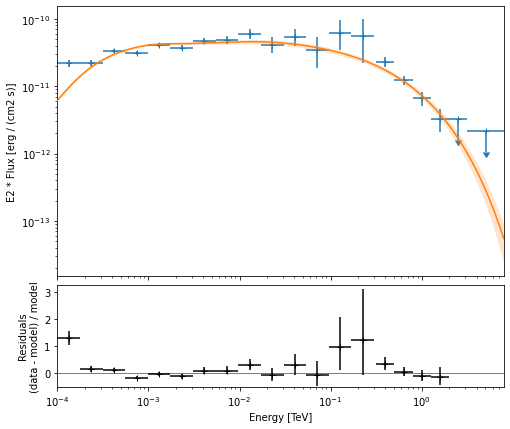

One interesting result is the cut-off of the proton spectrum:

In [ ]:
print('Cut-off energy: E_cut = ({:3.1f} +/- {:2.1f}) {}'.format(
                                                hadronic_model.parameters['e_cutoff'].value,
                                                hadronic_model.parameters['e_cutoff'].error,
                                                hadronic_model.parameters['e_cutoff'].unit))

Another scientific question is about the total energy in protons. We can get this number from the hadronic model:

In [ ]:
W_p = hadronic.Wp

In [ ]:
W_p

If you want to use the likelihood of the fit, here it is:

In [ ]:
L_hadronic = hadronic_result.total_stat

### Inverse Compton Model

When relativistic electrons scatter off photon fields energy is transferred to the photon. This is Inverse Compton scattering and the energy of the photons is in the GeV to TeV energy range.

We will start with the Cosmic Microwave Background as seed photon fields.

**Exercise:**

Create a naima model for Inverse Compton emission. Use ```electrons``` as particle distribution and CMB for the target photon field. Keep in mind that the photon fields is a list. Set the minimum energy to 511 keV (```Eemin = 511*u.keV```).

**[3 marks]**

In [ ]:
# your code here

#IC = ...



In [ ]:
print(IC.seed_photon_fields)

Expected output:

```
OrderedDict([('CMB', {'type': 'thermal', 'T': <Quantity 2.72548 K>, 'u': <Quantity 4.17467838e-13 erg / cm3>, 'isotropic': True})])
```

We will set a total energy and we create a ```NaimaSpectralModel``` with the correct distance.

In [ ]:
IC.set_We(1e60*u.erg)

IC_model = NaimaSpectralModel(IC, distance=distance)

In [ ]:
IC_model.parameters.to_table()

**Exercise:**

Freeze the parameters ```e_0``` and ```beta```.

**[1 mark]**

In [ ]:
# your code here
# 2 lines of code


In [ ]:
IC_model.parameters.to_table()

In [ ]:
IC_model.parameters['amplitude'].value = 1e46

**Exercise:**

Create a Datasets object called ```IC_ds``` by comining the ```fermipoints_ds``` and ```gammapoints_ds``` datasets. Use the ```models``` method to add a ```SkyModel``` with ```IC_model``` as spectral model. Print ```IC_ds```, then fit the model. Make sure that the fit converges and print the table of best-fit parameters. The fit may produce some RunTimeWarnings which you can ignore.

**[3 marks]**

In [ ]:
# your code here
# 6 lines of code
# IC_ds = ...


**Exercise:**

Make sure that the fit terminated successfully and make a plot of the fit result. 

**[3 marks]**

In [ ]:
# your code here
# 14 lines of code


Expected output:

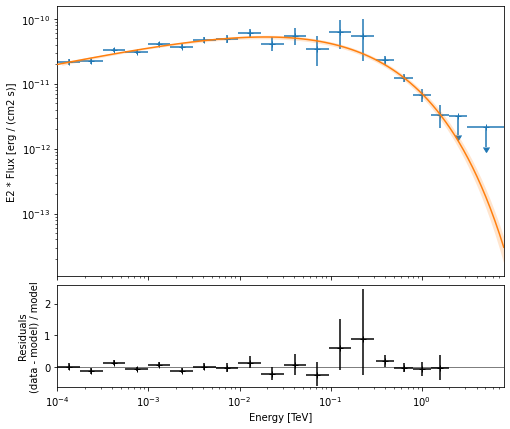

We can find the total energy in electrons and the cut-off energy of the electron spectrum:

In [ ]:
print('W_e = {:3.2}'.format(IC.We))
print('Cut-off energy: E_cut = ({:3.3f} +/- {:2.3f}) {}'.format(
                                                IC_model.parameters['e_cutoff'].value,
                                                IC_model.parameters['e_cutoff'].error,
                                                IC_model.parameters['e_cutoff'].unit))

Note that both values are lower than the corresponding values of the proton spectrum. The total energy is lower because the mass of an electron is much smaller than the mass of a proton. The cut-off energy is lower because electrons loose their energy much quicker than protons, mainly due to synchrotron radiation.

If you want to use the likelihood of the fit, here it is:

In [ ]:
L_IC = result.total_stat

### Comparing Hadronic and Leptonic Model

Let's make a plot of the two models. We want to plot the SED so we use ```energy_power=2```.

In [ ]:
fermipoints.plot(energy_power=2, label = 'Fermi/LAT')
hesspoints.plot(energy_power=2, label = 'H.E.S.S.')

IC_model.plot(energy_bounds=(1e-4*u.TeV, 100*u.TeV), energy_power=2, label = 'inverse Compton')
hadronic_model.plot(energy_bounds=(1e-4*u.TeV, 100*u.TeV), energy_power=2, label = 'pion decay')

plt.ylim([1e-13, 1e-10])
plt.xlim([1e-4*u.TeV,100*u.TeV])
plt.legend()

Let's print the results:

In [ ]:
print('\t\tpion decay\tinverse Compton')
print('total energy:\t{:2.1e}\t{:2.1e}'.format(hadronic.Wp, IC.We))
print('ln L:\t\t{:3.1f}\t\t{:3.1f}'.format(L_hadronic, L_IC))

**Exercise:**

Both models are independent and describe the data points well. The inverse Compton model seems to be better, the likelhood value is lower and the low-energy points are better fitted. Can you use Wilk's theorem (likelihood ratio test) to evaluate if the IC model is significantly better? Explain your answer.

**[2 marks]**

**Answer:**

This is a text cell. Put your answer here.

### Synchrotron Emission
Now we will fit the radio data points with a model for synchrotron radiation. We do not want to change the results for the electrons already obtained above, so we will create a new electron distribution (copied from the previous). We will not be able to fit the energy cut-off with the radio points, so we freeze the cut-off energy.

In [ ]:
electrons2 = copy.deepcopy(electrons)

Let's build a model for synchrotron radiation from these electrons. We will start with a magnetic field of $B = 1 \mu\mathsf{G}$.

In [ ]:
B = 1*u.microGauss

We use the synchrotron model from ```naima``` with a minimum energy corresponding to the rest energy of the electron. We build a NaimaSpectralModel with the correct distance.

In [ ]:
sync2 = naima.models.Synchrotron(electrons2, B = B, Eemin = 511*u.keV)

In [ ]:
sync2_model = NaimaSpectralModel(sync2, distance=distance)

In [ ]:
sync2_model.parameters.to_table()

We will freeze the reference energy ```e_0```, the amplitude and cut-off value to the previous value, and beta to 1. We want to fit only the magnetic field and we do not want to vary the amplitude. But we need to fit the spectral index again.

In [ ]:
sync2_model.parameters['e_0'].frozen = True
sync2_model.parameters['amplitude'].frozen = True
sync2_model.parameters['e_cutoff'].frozen = True
sync2_model.parameters['beta'].frozen = True

In [ ]:
sync2_model.parameters.to_table()

Let's create a data set with this model and the radio flux points.

In [ ]:
sync2_ds = FluxPointsDataset(SkyModel(spectral_model=sync2_model), radiopoints)

In [ ]:
fit=Fit()
result = fit.run(sync2_ds)
print(result)
print(result.parameters.to_table())

**Exercise:**

Make sure that the fit converges.

**[1 mark]**

In [ ]:
sync2_ds.plot_fit()

We find a magnetic field of 

In [ ]:
print('B = {:3.2f} +/- {:3.2f} {}'.format(sync2_model.parameters['B'].value,
                                   sync2_model.parameters['B'].error,
                                   sync2_model.parameters['B'].unit))

This is very low. We could reduce the amplitude (having less electrons) which would require a higher magnetic field.

Let's compare the spectral indices as we have found them from the synchrotron fit and the IC fit.

In [ ]:
print('synchrotron index: {:3.2f} +/- {:3.2f} vs. IC index: {:3.2f} +/- {:3.2f}'
      .format(sync2_model.parameters['alpha'].value, 
              sync2_model.parameters['alpha'].error,
              IC_model.parameters['alpha'].value, 
              IC_model.parameters['alpha'].error,
             )
     )

This is very much different. Our model for the electrons is probably too simple, we assume that it follows a power law from the lowest energy to the cut-off energy. We will stick to this model and try to improve the fit over all energies.

### Combined Fit of Synchrotron and inverse Compton

As a next step we will try to fit sychrotron and IC emission simultanously. We will start with the magnetic field found above.

In [ ]:
B = sync2_model.parameters['B'].quantity

In [ ]:
B

**Exercise:**

Create a new synchrotron model, but this time you use the ```electrons``` that we used in the IC fit. Stick to the name of the objects as indicated in the following cell.

**[3 marks]**

In [1]:
# your code here
# 2 lines of code

#sync = ...
#sync_model = ...



The synchrotron model has to have exactly the same parameters as the IC model. We will set them equal. Note that this does not mean to copy the current parameter values of the model but that the same parameter objects are used. The parameters will change in both models simultanously.

In [ ]:
sync_model.amplitude = IC_model.amplitude
sync_model.e_0 = IC_model.e_0
sync_model.e_cutoff = IC_model.e_cutoff
sync_model.alpha = IC_model.alpha
sync_model.beta = IC_model.beta

Let's check that the parameters are indeed the same.

In [ ]:
sync_model.parameters.to_table()

In [ ]:
IC_model.parameters.to_table()

We create a new data set and plot the spectrum.

In [ ]:
sync_ds = FluxPointsDataset(SkyModel(spectral_model=sync_model), radiopoints, name='sync_ds')

In [ ]:
sync_ds.plot_spectrum()

The model is much higher than the data points. So the magnetic field is probably to high. We can freeze all paramters but the magnetic field.

In [ ]:
for param in ['amplitude', 'e_0', 'e_cutoff', 'beta'] :
    sync_model.parameters[param].frozen = True

But we want to fit the spectral index ```alpha```.

In [ ]:
sync_model.alpha.frozen = False

In [ ]:
sync_model.parameters.to_table()

In [ ]:
fit = Fit()
electron_ds = Datasets([sync_ds, fermipoints_ds, hesspoints_ds])
print(electron_ds)
result = fit.run(electron_ds)
print(result)
print(result.parameters.to_table())

Make sure that the fit converges. When this is done we can try to refit all the other parameters.

In [ ]:
sync_model.amplitude.frozen = False
sync_model.e_cutoff.frozen = False

In [ ]:
result = fit.run(electron_ds)
print(result)
print(result.parameters.to_table())

In [ ]:
ax = plt.subplot()
ax.yaxis.set_units(u.Unit("TeV cm-2 s-1"))
ax.xaxis.set_units(u.Unit("TeV"))
kwargs = {"ax": ax, "sed_type": "e2dnde"}

for d in gamma_ds:
    d.data.plot(label=d.name, **kwargs)

energy_bounds = [1e-4, 1e1] * u.TeV
IC_model.plot(energy_bounds=energy_bounds, color="k", **kwargs)
IC_model.plot_error(energy_bounds=energy_bounds, **kwargs)
ax.set_ylim(1e-20, 1e-9)
ax.set_xlim(energy_bounds)
ax.legend()
plt.show()


The IC model fits the gamma rays well.

In [ ]:
sync_ds.plot_fit()

The synchrotron model does not fit the data points very well. This is mostly due to the spectral index being fixed by the gamma-ray fit.

Let's make a nice plot of what we have so far.

In [ ]:
energy_bounds = [1e-18, 100] * u.TeV

In [ ]:
def PlotPoints() :
    
    ax = plt.subplot()

    ax.yaxis.set_units(u.Unit("TeV cm-2 s-1"))
    ax.xaxis.set_units(u.Unit("TeV"))
    kwargs = {'ax': ax, 
              'sed_type': 'e2dnde',
             }

    fermipoints.plot(label = 'Fermi/LAT', **kwargs)
    hesspoints.plot(label = 'H.E.S.S.', **kwargs)
    radiopoints.plot(label = 'radio', **kwargs)

    ax.set_xlim(energy_bounds)

    ax.set_ylim(5e-15)
    
    plt.legend()


In [ ]:
PlotPoints()
IC_model.plot(energy_power=2, energy_bounds=energy_bounds, label = 'IC')
sync_model.plot(energy_bounds=energy_bounds, energy_power=2,label = 'synchrotron')

plt.legend()
plt.ylim(1e-15, 1e-8)

The magnetic field is

In [ ]:
print('B = {:3.2f} +/- {:3.2f} {}'.format(sync_model.parameters['B'].value,
                                   sync_model.parameters['B'].error,
                                   sync_model.parameters['B'].unit))

The magnetic field is lower than what we expect in interstellar space (several micro-Gauss) and we would expect a much higher magnetic field in the jet of an AGN. An increased magnetic field what imply a lower amplitude of the electrons, which in turn would reduce the amount of IC emission. We need to check if we missed important target photon fields for the IC emission.

### Synchrotron Self-Compton

The synchrotron photons act as target photons for inverse Compton emission (Synchrotron self-Compton, SSC). We need to consider this in our modeling. The synchrotron model provides the total number of synchrotron photons per energy. But we need a photon density. So we have to divide by the volume of the emission region. Let's assume a spherical emission region with a radius of

In [ ]:
# radius of emission region
R = 1e20*u.cm

The naima documentation has some instructions on how to build an SSC model: 

https://naima.readthedocs.io/en/latest/examples.html#crab-nebula-ssc-model

Fortunately, this is already implemented in gammapy. First we create an InverseCompton model, but we leave the photon_fields empty. We use ```electrons2``` which is from our synchrotron model fit.

In [ ]:
SSC = naima.models.InverseCompton(electrons2, Eemin = 511*u.keV)

Next we create a NaimaSpectralModel. We add additional parameters as ```nested_models```: The magnetic field from our synchrotron fit and the radius of the emission region.

In [ ]:
SSC_model = NaimaSpectralModel(SSC, distance=distance, 
                               nested_models={'SSC' : {'B' : sync2_model.parameters['B'].quantity, 
                                                       'radius' : R}})

In [ ]:
SSC_model.parameters.to_table()

You see that the radius is a fixed parameter. We will try to fit it later. But we have to freeze the reference energy ```e_0``` and ```beta```.

In [ ]:
SSC_model.parameters['e_0'].frozen = True
SSC_model.parameters['beta'].frozen = True

In [ ]:
PlotPoints()

sync2_model.plot(energy_power=2, energy_bounds=energy_bounds, label = 'synchrotron')

SSC_model.plot(energy_power=2, energy_bounds=energy_bounds, label = 'SSC')


plt.legend()
plt.ylim(1e-15, 1e-8)

The SSC model predicts a much higher flux then observed. This is what we expect, as the target photon field is much denser now. We start with just fitting the gamma rays. We need to create a data set and perform the fit. We freeze the magnetic field, we just want to reduce the amount of electrons.

In [ ]:
SSC_ds = Datasets([fermipoints_ds, hesspoints_ds])
SSC_ds.models = SkyModel(spectral_model=SSC_model)

In [ ]:
SSC_model.B.frozen = True

In [ ]:
result = fit.run(SSC_ds)
result = fit.run(SSC_ds)
print(result)
print(result.parameters.to_table())

In [ ]:
result = fit.run(SSC_ds)
print(result)
print(result.parameters.to_table())

Make sure that the fit converges (i.e. if it does not, keep running the above cell again until it does.). Let's make a plot of the result.

In [ ]:
#SSC_ds.plot_fit()
ax = plt.subplot()
ax.yaxis.set_units(u.Unit("TeV cm-2 s-1"))
ax.xaxis.set_units(u.Unit("TeV"))
kwargs = {"ax": ax, "sed_type": "e2dnde"}
for d in gamma_ds:
    d.data.plot(label=d.name, **kwargs)

#IC_model.plot(energy_power=2, energy_range=[1e-5,100]*u.TeV, label = 'IC')
#sync2_model.plot(energy_power=2, energy_bounds=energy_bounds, label = 'synchrotron')

SSC_model.plot(energy_power=2, energy_bounds=energy_bounds, label = 'SSC')

ax.set_xlim([1e-4, 1e1] * u.TeV)
plt.legend()
plt.ylim(1e-15, 1e-8)

The total energy in electrons went down:

In [ ]:
SSC.We

Next we check the model for the radio emisssion. We will set the same parameters to the synchrotron model and make a plot.

In [ ]:
sync2_model.amplitude = SSC_model.amplitude
sync2_model.e_0 = SSC_model.e_0
sync2_model.e_cutoff = SSC_model.e_cutoff
sync2_model.alpha = SSC_model.alpha
sync2_model.beta = SSC_model.beta
sync2_model.B = SSC_model.B

In [ ]:
sync2_ds.plot_fit()

We are below the radio points. So we need to increase the magnetic field. We freeze all parameters but the magnetic field and fit the radio data points.

In [ ]:
sync2_model.amplitude.frozen = True
sync2_model.e_cutoff.frozen = True
sync2_model.alpha.frozen = True
sync2_model.B.frozen = False

In [ ]:
sync2_model.parameters.to_table()

In [ ]:
fit = Fit()
result = fit.run(sync2_ds)
print(result)
print(result.parameters.to_table())

In [ ]:
sync2_model.B.quantity

The magnetic field went up. But this will also change the IC component:

In [ ]:
PlotPoints()

sync2_model.plot(energy_power=2, energy_bounds=energy_bounds, label = 'synchrotron')

SSC_model.plot(energy_power=2, energy_bounds=energy_bounds, label = 'SSC')


plt.legend()
plt.ylim(1e-15, 1e-8)

But we are close enough so that we can try to fit all together. We will free all parameters and do a combined fit.

In [ ]:
SSC_model.amplitude.frozen = False
SSC_model.e_cutoff.frozen = False
SSC_model.alpha.frozen = False

In [ ]:
model_combined = CompoundSpectralModel(sync2_model,
                                       SSC_model,
                                       operator.add)
combined_sky_model = SkyModel(spectral_model=model_combined,name = 'combined model')
electron3_ds = Datasets([sync_ds, fermipoints_ds, hesspoints_ds])
electron3_ds.models = combined_sky_model
result = fit.run(electron3_ds)
print(result)
print(result.parameters.to_table())

In [ ]:
ax = plt.subplot()
ax.yaxis.set_units(u.Unit("TeV cm-2 s-1"))
ax.xaxis.set_units(u.Unit("TeV"))
kwargs = {"ax": ax, "sed_type": "e2dnde"}
for d in gamma_ds:
    d.data.plot(label=d.name, **kwargs)

SSC_model.plot(energy_power=2, energy_bounds=energy_bounds, label = 'SSC')

ax.set_xlim([1e-4, 1e1] * u.TeV)
plt.legend()
plt.ylim(1e-15, 1e-8)

In [ ]:
sync_ds.plot_fit()

The gamma-ray fit looks good. The radio fit does not look very good, but this is probably the best we can do with our simple model. Let's make a plot of everything together.

In [ ]:
PlotPoints()

model_combined.plot(energy_power=2, energy_bounds=energy_bounds, label = 'combined')

plt.legend()
plt.ylim(1e-15, 1e-9)

### Fit of all parameters

Finally, we can also release the radius of the emission region and fit all parameters together.

In [ ]:
model_combined.parameters.to_table()

**Exerise:**

Release the radius in ```SSC_model```, fit the combined model using ```electron3_ds```, and make sure that the fit converges (Note: this may take many iterations, as the best-fit radius is much higher than the initial guess). Print the table of best-fit parameters and make a combined plot of your result. (You can use the ```plot``` method of ```model_combined```.)

**[6 marks]**

In [ ]:
# your code here
# ~11 lines of code


Expected output:

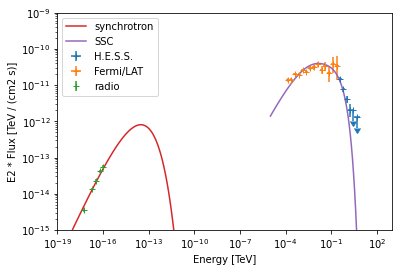

This model fits the data points well. Let's keep this as our final result. Let's take a look at the parameters we have found:

In [ ]:
print('total energy in electrons: \t {:3.2e}'.format(SSC.We))
print('magnetic field: \t\t {:3.2f} +/- {:3.2f} {}'.format(SSC_model.B.value, SSC_model.B.error, SSC_model.B.unit))
print('radius of emission region: \t {:3.1e} +/- {:3.1e} {}'.format(SSC_model.radius.value, SSC_model.radius.error, SSC_model.radius.unit))

The magnetic field is again very low and the emission region seems to be very large. The next steps would be to evaluate if these results are reasonable and to compare with results found in the literature. It would also be interesting to add optical or X-ray data to check the other end of the synchrotron emission.

## Conclusion

You have seen how you can read your analysis results and how you can describe the spectral data points with models that you have learned in PHYS3008. You can make conclusions about the particle content, the magnetic field and the size of the emission region.

You have also seen that it is not possible to start right away with fitting all the parameters. You need to find with good start parameters and sometimes you need to apply a step-by-step procedure. At each step you need to understand how the parameters influence the results.

## Sanity Check

Before you submit your work you should make a few checks that everything works fine.

1. ~~Save your notebook as a PDF (File->Download As->PDF). This document will help you debugging in the next step.~~
1. PDF export does not work. You can do File->Print Preview and then print to a file.
1. Restart the kernel and rerun the entire notebook (Kernel->Restart & Run All). This will delete all variables (but not your code) and rerun the notebook in one go. If this does not go through the end (i.e. you do not see the output of the next cell) then you have to fix it. You will see at which cell the run stopped. A common mistake is using a variable that is defined only at a later stage.
1. You think you fixed everything? Redo step 2 (Kernel->Restart & Run All)

In [ ]:
print('a\bYa\boa\bua\b a\baa\bra\bea\b a\bra\bea\baa\bda\bya\b a\bta\boa\b a\bsa\bua\bba\bma\bia\bta\b.a\b')

Do you see the output of the last cell without explicitly running it? Then the notebook goes through with one kernel restart. You can proceed to submission.
You do not see the output? Go back to step 2 above.

The jupyter notebook goes through all cells with one Kernel Restart & Run all.    **[1 mark]**

## Submission

You have to download and submit at least 3 files, the jupyter notebook and the two data files.
- Jupyter notebook. File->Download As->Notebook (.ipynb). Save this file on your disk.
- ~~You can also submit a PDF file. File->Download As->PDF. Save this file on your disk. If this does not work then leave it out.~~
- PDF export does not work. Save the notebook as HTML and submit the HTML file, or print the HTML file into a PDF.


Congratulations. You have succesfully completed your SED modelling project.